<a href="https://colab.research.google.com/github/watch-raider/Deep-Network-Development/blob/main/DND_Image_Classification_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 - Image Classification

This notebook contains the required task for the first assignment of the Deep Network Development course. Read the task description and fill in the empty code cells. Each section represents an implementation stage of an image classifier, from loading and inspecting the dataset to implementing and training a Convolutional Neural Network architecture. The sections guide you but you do not have to follow that specific order.

Copy this notebook to your drive (File -> Save a copy in Drive), edit it, and upload the final .ipynb file to [Canvas](https://canvas.elte.hu). If you using Colab notebook, save it as .ipynb and upload it. If you have your own machine with Jupyter installed, you can work there as well. Upload only the .ipynb file.


## Rules and Comments
- From the list of datasets and architectures listed in Canvas, each student was assigned **1 architecture** to use within this assignment. Please confirm yours in the Canvas assignment's description.
- This is a DL class so to pass the homework you do have to implement a working classifier, just loading the data or having a "random-guess" performance is not enough.
- As always, copying others' code will make you fail the homework automatically (and thus the course).
- **Deadline is October 17th 11:59 PM** (For late submission it is October 23rd 11:59PM)
- Make sure your code can be run from an empty state (use Runtime -> Run all in the menu after restarting the notebook)
- Feel free to add more code cells as needed. But don't put code into external Python files.
- Please add your name, Neptun ID, and task details below.

**Name:** Michael Walton  
**Neptun ID:** A2HPWF

**Network:**

**Objects:**

## Task description

Your task is to compare the performance of a given pre-trained model and a modified version of it, using a given dataset. The datasets contain images as input and class labels as target, thus you have to solve a Supervised Machine Learning Classification problem.

Steps
1. If your dataset has more than 5 classes, then select 5 classes of your choice (explain why). If your dataset has 5 or less classes, ignore this step.
2. The dataset should be split into train, validation and test sets. Some datasets already have these splits, otherwise, you can split the training set into validation and test sets.
3. Use the test set to do inference with the pre-trained model. Calculate the accuracy of the pre-trained model.
4. Modify the pre-trained model and train it with the train/validation sets. Modifying means removing/replacing/adding layers. We recommend changing the: head (you need to do this because the pre-trained models were created to predict 1000 classes from Imagenet, however, in your case, the number of classes is different, so you must change the head); backbone (remove/replace layers in the backbone. Be aware that once you do that, you need to be able to adjust the networks output dimensions by changing the properties like filter size, padding, etc)
5. Use the test set to do inference with the newly modified/trained model. Calculate the accuracy.
6. Compare the results from the pre-trained model and the modified version.
7. Explain the differences.
Please submit only the notebook to Canvas. (Do not upload the dataset nor the models)

There is no expected percentage of accuracy, but **your accuracy should be better than random guessing and your loss has to decrease throughout the epochs**. We expect you to show visualizations (matplotlib, seaborn, ...) of the accuracy, loss, and confusion matrix. Use Early stopping and save the best model while training your network.


# In order to get your grade for the assignment, you must defend it by answering questions during the designated practice time.


There are some example questions at the end of the notebook.

## 0. Import libraries
Import all libraries/packages that you believe will help you fulfil the task, but **for the network only PyTorch can be used.**

In [ ]:
# ADD YOUR CODE HERE
import tarfile
import io
import os
import urllib.request as urllib2
import pandas as pd
import math
import shutil

import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

#Set up GPU or CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


## 1. Dataset
Load the dataset you were given. Images should be stored in an X variable and your labels in a Y variable. Split your dataset into train, validation and test set and pre-process your data for training.

#### Loading one example for each object type from the dataset
Show some images and labels of your dataset

In [ ]:
# ADD YOUR CODE HERE

url = "https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-320.tgz"

# open file
root = urllib2.urlopen(url)
file = tarfile.open(fileobj=root,mode='r:gz')
folder_path = "data"
file.extractall(folder_path)
print(os.path.abspath(folder_path))

/content/data


In [ ]:
# remove unwanted class folders
#classes = os.listdir(train_folder)
classes = os.listdir(os.path.join(folder_path, "imagenette2-320/train"))
print(classes)
shutil.rmtree(f'{os.path.join(folder_path, "imagenette2-320/train")}/n03028079')
shutil.rmtree(f'{os.path.join(folder_path, "imagenette2-320/train")}/n03417042')
shutil.rmtree(f'{os.path.join(folder_path, "imagenette2-320/train")}/n03425413')
shutil.rmtree(f'{os.path.join(folder_path, "imagenette2-320/train")}/n02979186')
shutil.rmtree(f'{os.path.join(folder_path, "imagenette2-320/train")}/n03000684')
shutil.rmtree(f'{os.path.join(folder_path, "imagenette2-320/val")}/n03028079')
shutil.rmtree(f'{os.path.join(folder_path, "imagenette2-320/val")}/n03417042')
shutil.rmtree(f'{os.path.join(folder_path, "imagenette2-320/val")}/n03425413')
shutil.rmtree(f'{os.path.join(folder_path, "imagenette2-320/val")}/n02979186')
shutil.rmtree(f'{os.path.join(folder_path, "imagenette2-320/val")}/n03000684')
classes = os.listdir(os.path.join(folder_path, "imagenette2-320/train"))
print(classes)

train_folder = os.path.join(folder_path, "imagenette2-320/train")
valid_folder = os.path.join(folder_path, "imagenette2-320/val")

train_transform = transforms.Compose(
    [transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

valid_transform = transforms.Compose(
    [transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = torchvision.datasets.ImageFolder(train_folder, train_transform)
valid_dataset = torchvision.datasets.ImageFolder(valid_folder, valid_transform)

['n03394916', 'n03425413', 'n03888257', 'n03417042', 'n01440764', 'n03445777', 'n03000684', 'n02102040', 'n02979186', 'n03028079']
['n03394916', 'n03888257', 'n01440764', 'n03445777', 'n02102040']


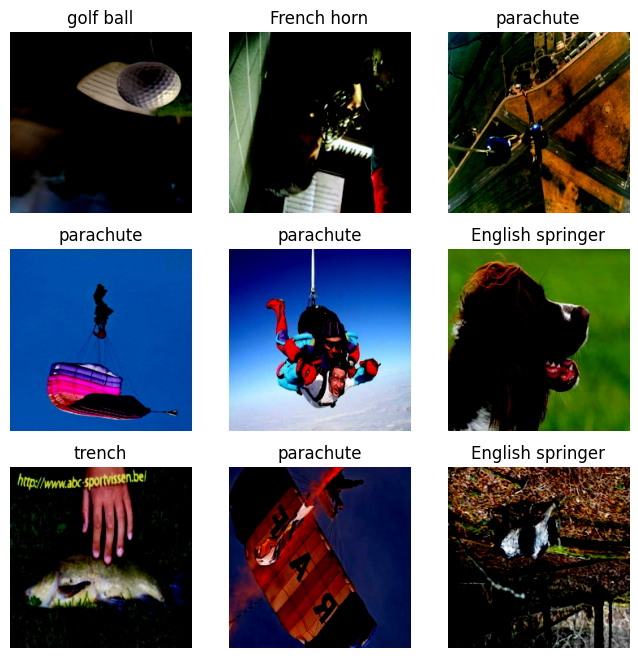

In [ ]:
classes_names = ["trench", "English springer", "French horn", "golf ball", "parachute"]

def show_ds(ds):
    labels_map = {
        0: "trench",
        1: "English springer",
        2: "French horn",
        3: "golf ball",
        4: "parachute",
    }

    figure = plt.figure(figsize=(8, 8))
    cols, rows = 3, 3
    for i in range(1, cols * rows + 1):
        sample_idx = torch.randint(len(ds), size=(1,)).item()
        img, label = ds[sample_idx]
        figure.add_subplot(rows, cols, i)
        plt.title(labels_map[label])
        plt.axis("off")
        plt.imshow(img.permute(1, 2, 0), cmap="gray")
    plt.show()

show_ds(train_dataset)

#### Splitting the dataset

In [ ]:
# ADD YOUR CODE HERE
test_size = math.floor(0.4 * len(valid_dataset))
valid_size = math.ceil(0.6 * len(valid_dataset))
val_dataset, test_dataset = torch.utils.data.random_split(valid_dataset, [valid_size, test_size])

#### Pre-processing the dataset (data loader with transformations)

In [ ]:
# ADD YOUR CODE HERE
batch_size = 64

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

image_datasets = {'train': train_dataset,
                  'val': val_dataset,
                  'test': test_dataset
                  }
data_loaders = {'train': train_loader,
                  'val': val_loader,
                  'test': test_loader
                  }
dataset_sizes = {'train': len(train_dataset),
                  'val': len(val_dataset),
                  'test': len(test_dataset)
                  }

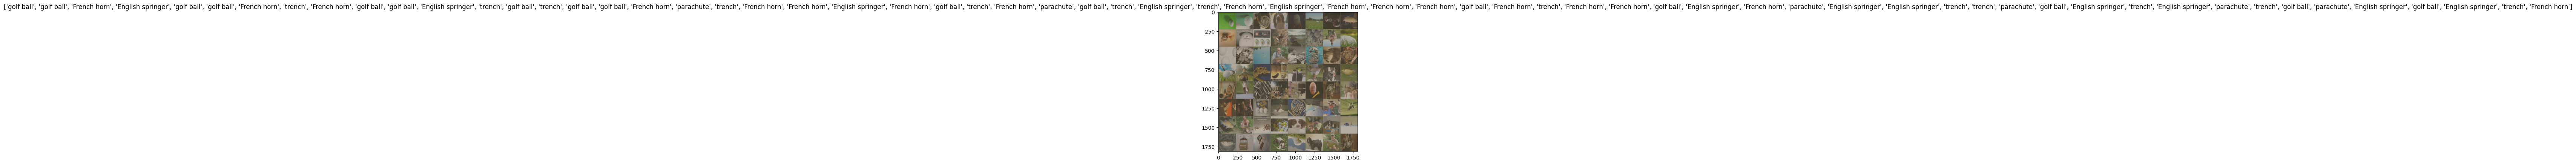

In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)

# Get a batch of training data
inputs, classes = next(iter(data_loaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[classes_names[x] for x in classes])

#### Check the number of images and class balances in the  train, validation and test set

In [ ]:
# ADD YOUR CODE HERE
print(dataset_sizes)
print(f'Classes: {train_loader.dataset.classes}')

{'train': 4785, 'val': 1179, 'test': 786}
Classes: ['n01440764', 'n02102040', 'n03394916', 'n03445777', 'n03888257']


## 2. Convolutional Neural Network Architecture
Load the pre-trained CNN architecture you were given. Reduce the size of the given model by removing some layers and parameters with less influence. Define the optimizer and loss function. Train your network and save it. Remember to use Early stopping and show results.

#### Load the given pre-trained model

In [ ]:
# ADD YOUR CODE HERE
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim

vgg16_model = models.vgg16(pretrained=True)

#### Summary of the given pre-trained model

In [ ]:
# ADD YOUR CODE HERE
vgg16_model.to(device)
vgg16_model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
vgg16_model.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [ ]:
def test_accuracy(model, phase):
    model.to(device)
    correct = 0
    total = 0
    labels_total=[]
    prediction_total=[]
    # since we're not training, we don't need to calculate the gradients for our outputs
    model.eval()
    for data in data_loaders[phase]:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = model(images.to(device))
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        predicted=predicted.cpu()
        labels_total=np.append(labels_total,labels.numpy(), axis=0)
        prediction_total=np.append(prediction_total,predicted.numpy(), axis=0)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    return correct, total, labels_total, prediction_total

In [ ]:
correct, total, labels_total, prediction_total = test_accuracy(vgg16_model, 'test')
print(f'Correct: {correct}, Total: {total}')

print(f'Accuracy of the network on the {len(test_dataset)} test images: %d %%' % (
    100 * correct / total))

Correct: 146, Total: 786
Accuracy of the network on the 786 test images: 18 %


#### Implement the new architecture with less parameter

In [ ]:
# ADD YOUR CODE HERE
# Change head of model by replacing last layer to match number of out features to number of classes
num_features = vgg16_model.classifier[6].in_features
out_features = len(classes_names)
vgg16_model.classifier[6] = nn.Linear(num_features, out_features)

vgg16_model.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=5, bias=True)
)

In [ ]:
correct, total, labels_total, prediction_total = test_accuracy(vgg16_model, 'test')
print(f'Correct: {correct}, Total: {total}')

print(f'Accuracy of the network on the {len(test_dataset)} test images: %d %%' % (
    100 * correct / total))

Correct: 255, Total: 786
Accuracy of the network on the 786 test images: 32 %


In [ ]:
# Change backbone of model by increasing kernel and changing padding to valid

idxs = [0, 2, 5, 7, 10, 12, 14, 17, 19, 21, 24, 26, 28]

for i in idxs:
  vgg16_model.features[i].kernel_size = 5
  vgg16_model.features[i].padding = 'valid'

vgg16_model.features

Sequential(
  (0): Conv2d(3, 64, kernel_size=5, stride=(1, 1), padding=valid)
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=5, stride=(1, 1), padding=valid)
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=5, stride=(1, 1), padding=valid)
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=5, stride=(1, 1), padding=valid)
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=5, stride=(1, 1), padding=valid)
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=5, stride=(1, 1), padding=valid)
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=5, stride=(1, 1), padding=valid)
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_size=5, stride=(1, 1), padding=valid)
  (18)

In [ ]:
correct, total, labels_total, prediction_total = test_accuracy(vgg16_model, 'test')
print(f'Correct: {correct}, Total: {total}')

print(f'Accuracy of the network on the {len(test_dataset)} test images: %d %%' % (
    100 * correct / total))

Correct: 189, Total: 786
Accuracy of the network on the 786 test images: 24 %


#### Summary of the new architecture

In [ ]:
# ADD YOUR CODE HERE
vgg16_model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=5, stride=(1, 1), padding=valid)
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=5, stride=(1, 1), padding=valid)
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=5, stride=(1, 1), padding=valid)
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=5, stride=(1, 1), padding=valid)
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=5, stride=(1, 1), padding=valid)
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=5, stride=(1, 1), padding=valid)
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=5, stride=(1, 1), padding=valid)
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d(256, 5

## 3. Training

#### Define your loss function

In [ ]:
# ADD YOUR CODE HERE
loss_fn = nn.CrossEntropyLoss()

#### Define your optimizer

In [ ]:
# ADD YOUR CODE HERE
optimiser = optim.SGD(vgg16_model.parameters(), lr=0.01, momentum=0.8)

#### Train your network

In [ ]:
import time
import copy

def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    model.to(device)
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    val_acc_h=[]
    train_acc_h=[]
    for epoch in range(num_epochs):


        print('Epoch {}/{} LR {:.6f}'.format(epoch, num_epochs - 1, scheduler.get_last_lr()[0]))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in data_loaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()


                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))
            if phase == 'train':
                train_acc_h.append(epoch_acc)
            # deep copy the model
            if phase == 'val':
                val_acc_h.append(epoch_acc)
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())


        print('Test started')
    phase == 'test'
    model.eval()
    running_loss = 0.0
    running_corrects = 0
    for inputs, labels in data_loaders[phase]:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        test_loss = running_loss / dataset_sizes[phase]
        test_acc = running_corrects.double() / dataset_sizes[phase]

    time_elapsed = time.time() - since
    print('Training and testing complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))
    print('Test Acc: {:4f}'.format(test_acc))
    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, val_acc_h, train_acc_h, test_acc

In [ ]:
# ADD YOUR CODE HERE
vgg16_model.to(device)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimiser, step_size=4, gamma=0.1)

#### Show the loss on training and validation sets

In [ ]:
# ADD YOUR CODE HERE
model, val_acc_h, train_acc_h, test_acc = train_model(vgg16_model, loss_fn, optimiser, exp_lr_scheduler,
                       num_epochs=10)

Epoch 0/9 LR 0.010000
----------
train Loss: 0.8772 Acc: 0.7026
val Loss: 0.4583 Acc: 0.8601
Test started
Epoch 1/9 LR 0.010000
----------
train Loss: 0.3306 Acc: 0.8989
val Loss: 0.2916 Acc: 0.9143
Test started
Epoch 2/9 LR 0.010000
----------
train Loss: 0.1901 Acc: 0.9375
val Loss: 0.2172 Acc: 0.9262
Test started
Epoch 3/9 LR 0.010000
----------
train Loss: 0.1321 Acc: 0.9572
val Loss: 0.2048 Acc: 0.9338
Test started
Epoch 4/9 LR 0.001000
----------
train Loss: 0.0880 Acc: 0.9732
val Loss: 0.1633 Acc: 0.9517
Test started
Epoch 5/9 LR 0.001000
----------
train Loss: 0.0672 Acc: 0.9778
val Loss: 0.1579 Acc: 0.9542
Test started
Epoch 6/9 LR 0.001000
----------
train Loss: 0.0502 Acc: 0.9852
val Loss: 0.1660 Acc: 0.9508
Test started
Epoch 7/9 LR 0.001000
----------
train Loss: 0.0496 Acc: 0.9847
val Loss: 0.1655 Acc: 0.9517
Test started
Epoch 8/9 LR 0.000100
----------
train Loss: 0.0450 Acc: 0.9858
val Loss: 0.1618 Acc: 0.9525
Test started
Epoch 9/9 LR 0.000100
----------
train Loss: 0

#### Show the accuracy on training and validation sets

In [ ]:
# ADD YOUR CODE HERE
def plot_acc(train_acc_h, val_acc_h, test_acc=None):
    plt.figure(figsize=(10,6))
    plt.xlabel('Iteration')
    plt.ylabel('Acc')
    plt.title('Acc by Iteration')
    plt.plot(torch.tensor(train_acc_h, device = 'cpu')*100)
    plt.plot(torch.tensor(val_acc_h, device = 'cpu')*100)
    if test_acc != None:
      plt.plot(torch.tensor(test_acc, device = 'cpu')*100*np.ones(len(val_acc_h)))
    plt.ylim((50,100))
    plt.legend(['train', 'valid', 'test'])

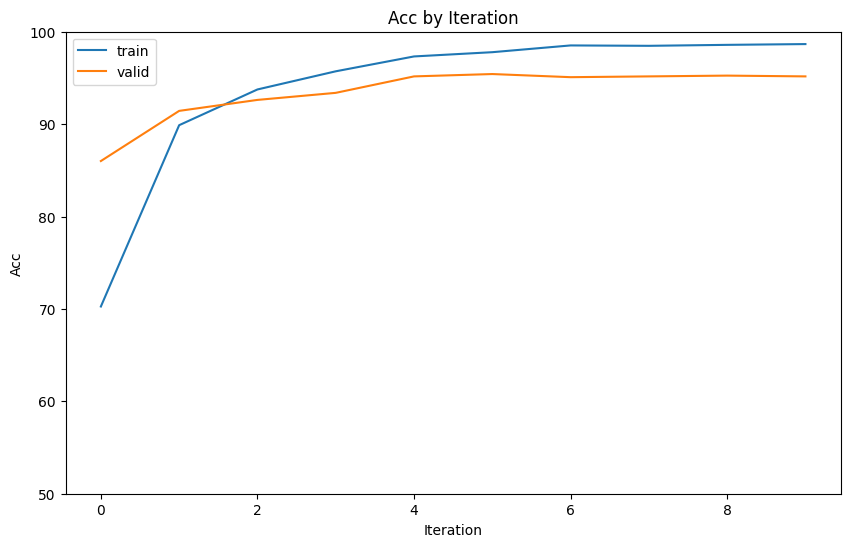

In [ ]:
plot_acc(train_acc_h,val_acc_h)

#### Save your trained CNN

In [ ]:
# ADD YOUR CODE HERE
torch.save(vgg16_model.state_dict(), 'vgg16')

## 4. Evaluation and Testing
Load your trained CNN and evaluate it on the test set.
Show the confusion matrix on the test set.
Show some predictions on the test set (3 is enough) by plotting the image and printing the prediction and ground truth.
Show some missed predictions (3 is enough) and try to explain why it was difficult for the model to recognize these images.

#### Evaluate your model

In [ ]:
# ADD YOUR CODE HERE
vgg16_model.load_state_dict(torch.load('vgg16'))
vgg16_model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=5, stride=(1, 1), padding=valid)
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=5, stride=(1, 1), padding=valid)
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=5, stride=(1, 1), padding=valid)
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=5, stride=(1, 1), padding=valid)
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=5, stride=(1, 1), padding=valid)
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=5, stride=(1, 1), padding=valid)
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=5, stride=(1, 1), padding=valid)
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d(256, 5

#### Show the test accuracy next to the training and validation

In [ ]:
correct, total, labels_total, prediction_total = test_accuracy(vgg16_model, 'test')
print(f'Correct: {correct}, Total: {total}')

print(f'Accuracy of the network on the {len(test_dataset)} test images: %d %%' % (
    100 * correct / total))

Correct: 749, Total: 786
Accuracy of the network on the 786 test images: 95 %


<ipython-input-116-684a4d5e76b6>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  plt.plot(torch.tensor(test_acc, device = 'cpu')*100*np.ones(len(val_acc_h)))


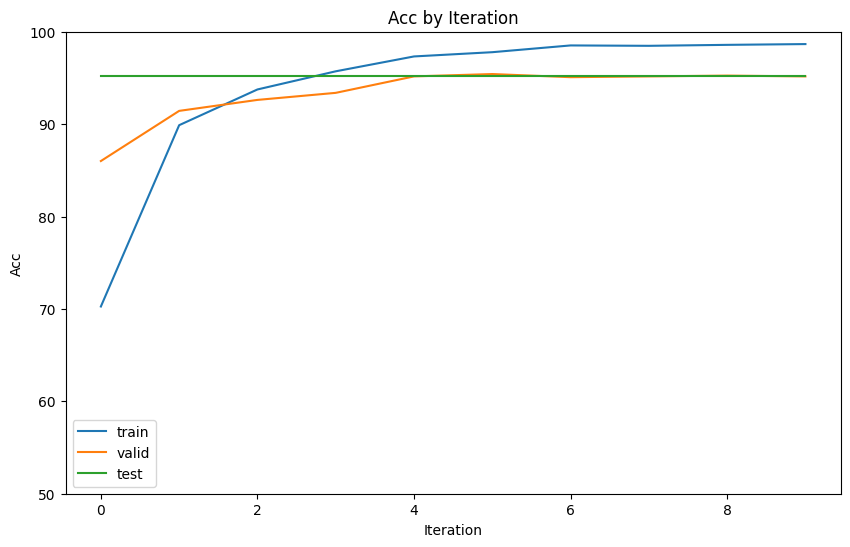

In [ ]:
# ADD YOUR CODE HERE
plot_acc(train_acc_h,val_acc_h, test_acc)

#### Confusion matrix

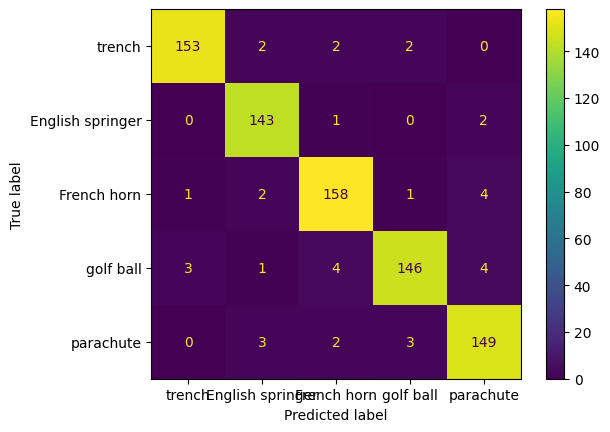

In [ ]:
# ADD YOUR CODE HERE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(labels_total, prediction_total)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes_names)
disp.plot()

<Axes: >

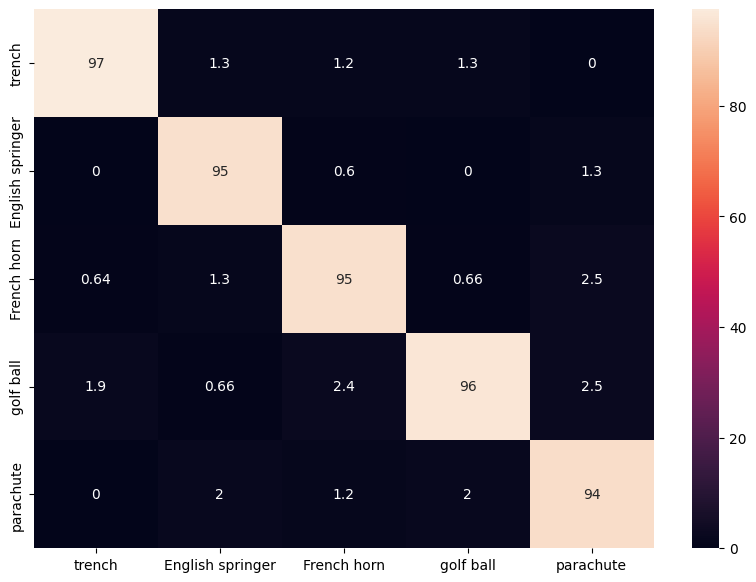

In [ ]:
import seaborn as sn
import pandas as pd
cm=cm/np.sum(cm,axis=0)*100 # axis=0 rows of a data
df_cm = pd.DataFrame(cm, index =  classes_names, columns =  classes_names)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

#### Show some predictions

In [ ]:
def visualize_model(model, phase, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    for i, (inputs, labels) in enumerate(data_loaders[phase]):
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

        for j in range(inputs.size()[0]):
            fig = plt.figure(figsize=(10,10))
            images_so_far += 1
            ax = plt.subplot(num_images//2, 2, images_so_far)
            ax.axis('off')
            ax.set_title('predicted: {}'.format(classes_names[preds[j]]))
            imshow(inputs.cpu().data[j])

            if images_so_far == num_images:
                model.train(mode=was_training)
                return
        model.train(mode=was_training)

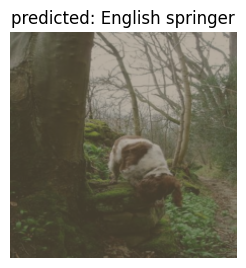

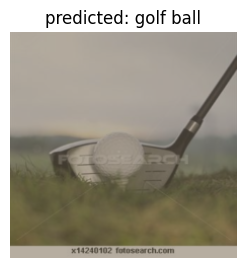

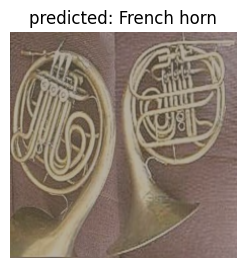

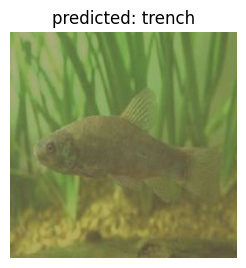

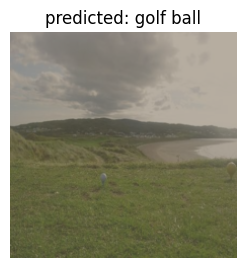

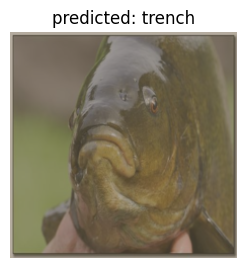

In [ ]:
# ADD YOUR CODE HERE
visualize_model(vgg16_model, 'test')

#### Missed predictions

In [ ]:
# ADD YOUR CODE HERE

## 5. Some example questions that help you prepare for the defense

* Data
    - Describe your dataset.
    - List augmentation techniques.
    - Normalization standardization why do we use them?

* Model
    - Describe the model and its parameters (Convolutional Layer, Pooling
    - Layer, flatten, concatenation, activation, linear, argmax().
    - How can we change the output dimension? What happens if we change the head or the backbone? (filter number or replace them,...).

* optimizer
    - Describe the optimizer. What parameters does it have? (some connection to the date, model, and loss function)

* Loss function and regularisation
    - Describe the loss functions and some regularization methods.

* Results
    - Describe the results based on overfitting, underfitting, bias, and variance.
    - Does the trained model complete the given task? What is the baseline for classification?
    - Then the data balance, if it were unbalanced how would they deal with it?
    - What other aspects can cause biased output? What simple methods do we have to unbias the model?
    - Try to explain why it was difficult for the model to recognize the missed predictions.
    - How can we improve the model?

#### Answer the questions (optional, but recommended for the  preparation)

In [ ]:
# ADD YOUR ANSWERS HERE